# pair work
# Songyang Cheng
# Yuanhang Wang

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [4]:
pd.crosstab(train_df['SaleCondition'],train_df['SalePrice'])

SalePrice,34900,35311,37900,39300,40000,52000,52500,55000,55993,58500,...,485000,501837,538000,555000,556581,582933,611657,625000,745000,755000
SaleCondition,,,,,,,,,,,,,,,,,,,,,
Abnorml,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
AdjLand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alloca,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Family,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Normal,0,0,0,1,1,1,1,2,0,1,...,0,0,1,1,0,0,0,1,0,1
Partial,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,0,0,0


选择的column:
LotArea  log2(LotArea)
LotShape Merge IR1,IR2,IR3 into IR
Neighborhood classification
             tier1: "CollgCr", "Veenker"
             tier2: "Crawfor", "NoRidge", "Mitchel", "Somerst", "NWAmes"
             tier3: "OldTown", "Brkside", "Sawyer", "NridgHt", "NAmes", "SawyerW", "IDOTRR", "MeadowV"
             tier4: "Edwards", "Timber", "Gilbert", "StoneBr", "ClearCr"
             tier5: "NPkVill","Blmngton","BrDale","SWISU", "Blueste"
HouseStyle       Floor2: 2STory, 2.5Fin
             Floor1.5: 1.5Fin, 1.5Unf, SFoyer, 2.5Unf
             Floor1: SLvl, 1story
OverallQual  1,2,3 -> 3
YearRemodAdd 10 year as 1 group 
ExterQual    TA=Fa+TA, Gd=Ex+Gd
HeatingQC    Bad=Fa+TA
CentralAir   
Electrical   Fuse = FuseP, FuseA, FuseF, Mix 
GrLivArea    
TotRmsAbvGrd 4 = 2,3,4; 10 = 10,11,12
Fireplaces   2 = 2,3
GarageType   detached = detached, basment, 2types, carport. Fill Na as noGarage
GarageArea   qcut 10

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

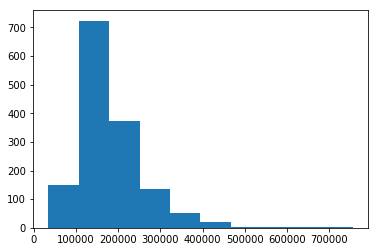

In [5]:
plt.hist(train_df.SalePrice)

In [6]:
train_df['SalePriceBin'] = pd.qcut(train_df.SalePrice,5)

In [7]:
train_df['SalePriceBin'].head()

0    (179280.0, 230000.0]
1    (179280.0, 230000.0]
2    (179280.0, 230000.0]
3    (124000.0, 147000.0]
4    (230000.0, 755000.0]
Name: SalePriceBin, dtype: category
Categories (5, interval[float64]): [(34899.999, 124000.0] < (124000.0, 147000.0] < (147000.0, 179280.0] < (179280.0, 230000.0] < (230000.0, 755000.0]]

In [8]:
pd.crosstab(train_df['SaleCondition'],train_df['SalePriceBin'])

SalePriceBin,"(34899.999, 124000.0]","(124000.0, 147000.0]","(147000.0, 179280.0]","(179280.0, 230000.0]","(230000.0, 755000.0]"
SaleCondition,,,,,
Abnorml,45,20,15,12,9
AdjLand,2,2,0,0,0
Alloca,5,1,2,2,2
Family,6,5,5,2,2
Normal,235,262,248,247,206
Partial,2,4,17,32,70


In [9]:
train_df.corr()["SalePrice"].sort_values(ascending  = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

# data preprocessing

In [10]:
train_df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [11]:
train_df.LotArea.value_counts()

7200     25
9600     24
6000     17
10800    14
9000     14
8400     14
1680     10
7500      9
8125      8
9100      8
6120      8
6240      8
3182      7
7800      6
8450      6
10000     5
4500      5
4435      5
5000      5
10140     5
9750      5
10400     5
5400      5
7018      4
11700     4
9375      4
8800      4
9900      4
8750      4
6600      4
         ..
3136      1
13418     1
10448     1
8849      1
7313      1
11425     1
13472     1
8029      1
11952     1
9738      1
12936     1
5271      1
11414     1
12122     1
9364      1
7314      1
9360      1
16226     1
11404     1
15498     1
9353      1
11400     1
14175     1
7301      1
11394     1
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

(array([ 0.,  0.,  0.,  7., 18., 15., 14., 17.,  6., 18., 18., 24., 16.,
        23., 17., 50., 17., 44., 71., 53., 58., 99., 97., 73., 82., 73.,
        70., 57., 55., 48., 48., 28., 27., 23., 25., 23., 16.,  9., 10.,
         9., 11., 11.,  5.,  6.,  5.,  3.,  1.,  3.,  2.,  2.]),
 array([    0.,   400.,   800.,  1200.,  1600.,  2000.,  2400.,  2800.,
         3200.,  3600.,  4000.,  4400.,  4800.,  5200.,  5600.,  6000.,
         6400.,  6800.,  7200.,  7600.,  8000.,  8400.,  8800.,  9200.,
         9600., 10000., 10400., 10800., 11200., 11600., 12000., 12400.,
        12800., 13200., 13600., 14000., 14400., 14800., 15200., 15600.,
        16000., 16400., 16800., 17200., 17600., 18000., 18400., 18800.,
        19200., 19600., 20000.]),
 <a list of 50 Patch objects>)

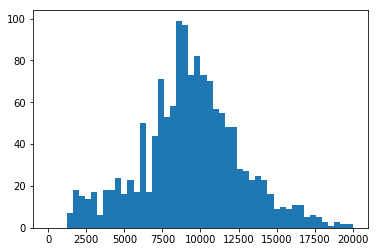

In [12]:
# train_df.LotArea2 = train_df.drop(train_df[train_df.LotArea>50000],axis = 0)
plt.hist(train_df.LotArea, bins =50, range = (0,20000))

(array([2., 3., 8., 2., 2., 2., 1., 1., 4., 1., 2., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.]),
 array([20000., 20600., 21200., 21800., 22400., 23000., 23600., 24200.,
        24800., 25400., 26000., 26600., 27200., 27800., 28400., 29000.,
        29600., 30200., 30800., 31400., 32000., 32600., 33200., 33800.,
        34400., 35000., 35600., 36200., 36800., 37400., 38000., 38600.,
        39200., 39800., 40400., 41000., 41600., 42200., 42800., 43400.,
        44000., 44600., 45200., 45800., 46400., 47000., 47600., 48200.,
        48800., 49400., 50000.]),
 <a list of 50 Patch objects>)

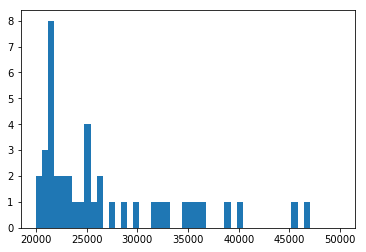

In [13]:
plt.hist(train_df.LotArea, bins =50, range = (20000,50000))

(array([  1.,   5.,  11.,   7.,   7.,   9.,  12.,   3.,  18.,   6.,  16.,
         23.,  20.,  32.,  40.,  44.,  88., 120., 187., 201., 178., 149.,
         91.,  70.,  40.,  22.,   8.,  15.,   7.,   6.,   2.,   3.,   4.,
          2.,   1.,   2.,   3.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   2.,   0.,   1.]),
 array([10.34429591, 10.49172239, 10.63914888, 10.78657537, 10.93400185,
        11.08142834, 11.22885482, 11.37628131, 11.52370779, 11.67113428,
        11.81856077, 11.96598725, 12.11341374, 12.26084022, 12.40826671,
        12.5556932 , 12.70311968, 12.85054617, 12.99797265, 13.14539914,
        13.29282562, 13.44025211, 13.5876786 , 13.73510508, 13.88253157,
        14.02995805, 14.17738454, 14.32481103, 14.47223751, 14.619664  ,
        14.76709048, 14.91451697, 15.06194345, 15.20936994, 15.35679643,
        15.50422291, 15.6516494 , 15.79907588, 15.94650237, 16.09392886,
        16.24135534, 16.38878183, 16.53620831, 16.6836348 , 16.83106128,
 

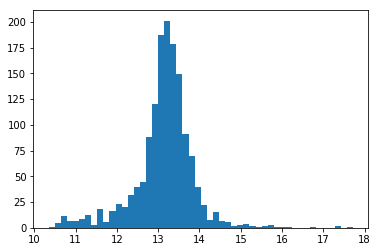

In [14]:
plt.hist(np.log2(train_df.LotArea), bins =50)

In [15]:
# s = train_df['LotArea'].value_counts(normalize = True)

In [16]:
# s

In [17]:
train_df['LotAreaLog'] = np.log2(train_df['LotArea'])

In [18]:
train_df['LotAreaLog'].head()

0    13.044736
1    13.228819
2    13.457637
3    13.221285
4    13.799686
Name: LotAreaLog, dtype: float64

In [19]:
train_df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

C:\Users\CSY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


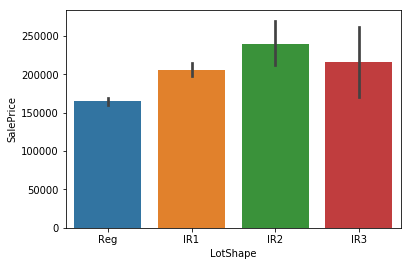

In [20]:
import seaborn as sns
sns.barplot(x = train_df["LotShape"], y = train_df.SalePrice)

In [21]:
train_df["LotShapeCat"]  = train_df.LotShape.replace(["IR1", "IR2", "IR3"], "IR")

In [22]:
train_df["LotShapeCat"].unique()

array(['Reg', 'IR'], dtype=object)

In [23]:
train_df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

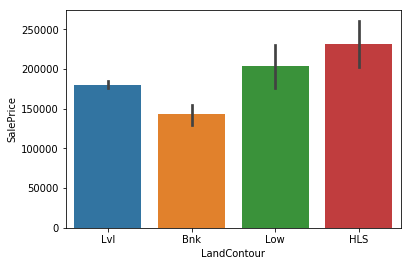

In [24]:
sns.barplot(x = train_df["LandContour"], y = train_df.SalePrice)

In [25]:
train_df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [26]:
train_df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

<BarContainer object of 1460 artists>

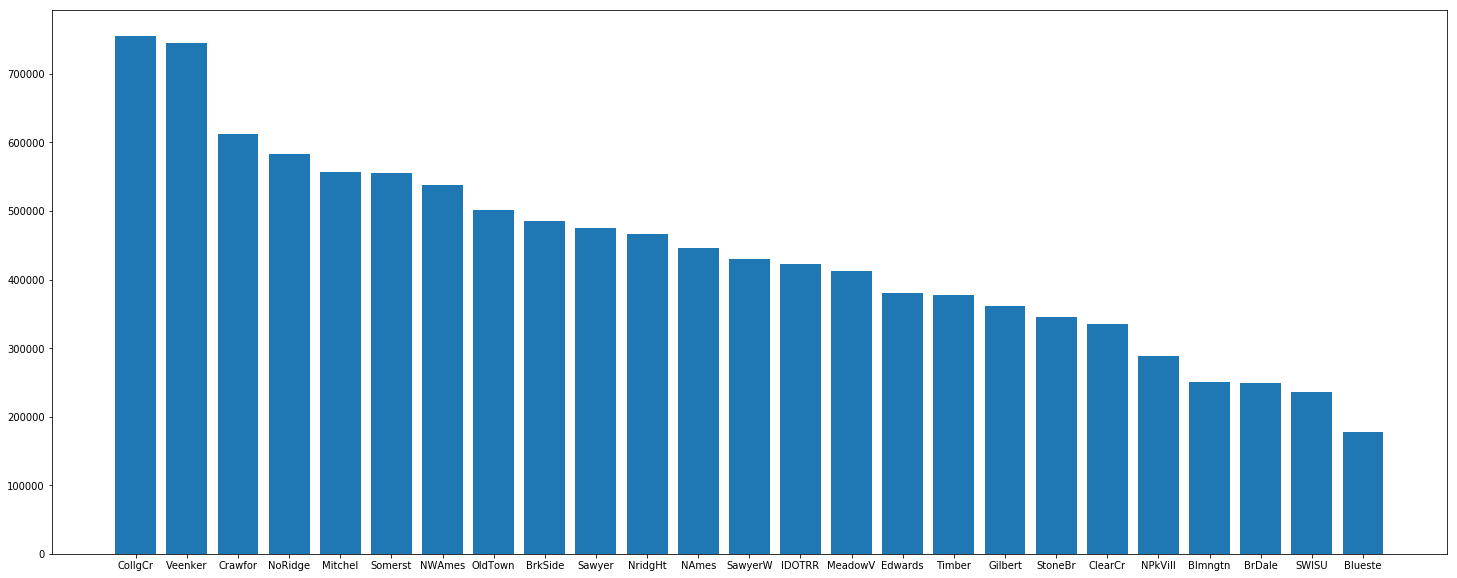

In [27]:
plt.rcParams['figure.figsize'] = (25,10)
y = train_df.SalePrice[np.argsort(-train_df.SalePrice)]
# sns.barplot(x = train_df["Neighborhood"], y = y )
plt.bar(train_df["Neighborhood"], y )

In [28]:
train_df["NeighborhoodBin"]  = train_df["Neighborhood"]
train_df["NeighborhoodBin"]  = train_df["NeighborhoodBin"].replace(["Veenker", "CollgCr"], "tier1")
train_df["NeighborhoodBin"]  = train_df["NeighborhoodBin"].replace(["Crawfor", "NoRidge", "Mitchel","Somerst","NWAmes"], "tier2")
train_df["NeighborhoodBin"]  = train_df["NeighborhoodBin"].replace(["OldTown","BrkSide","Sawyer","NridgHt","NAmes",\
                                                              "SawyerW","IDOTRR","MeadowV"], "tier3")
train_df["NeighborhoodBin"]  = train_df["NeighborhoodBin"].replace(["Edwards", "Timber","Gilbert","StoneBr","ClearCr"], "tier4")
train_df["NeighborhoodBin"]  = train_df["NeighborhoodBin"].replace(["NPkVill", "Blmngtn","BrDale","SWISU","Blueste"], "tier5")

In [29]:
train_df["NeighborhoodBin"].head()

0    tier1
1    tier1
2    tier1
3    tier2
4    tier2
Name: NeighborhoodBin, dtype: object

In [30]:
train_df["NeighborhoodBin"].unique()

array(['tier1', 'tier2', 'tier3', 'tier4', 'tier5'], dtype=object)

In [31]:
train_df.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

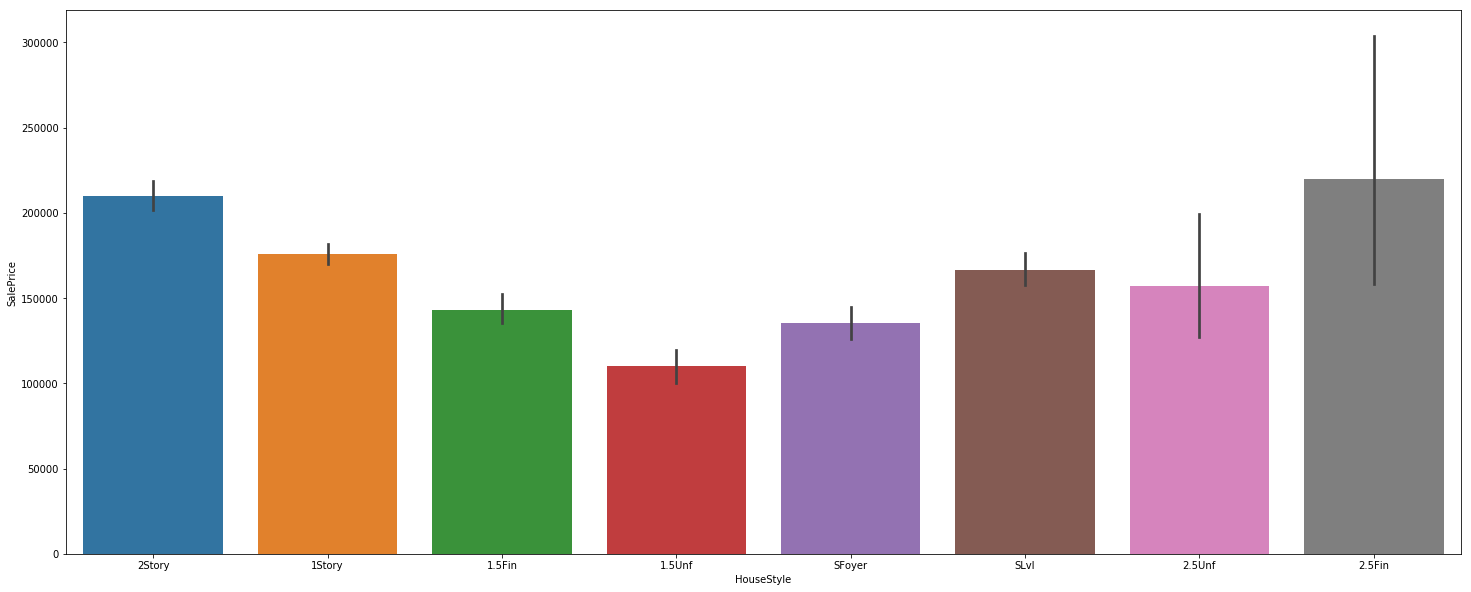

In [32]:
sns.barplot(x = train_df["HouseStyle"], y = train_df.SalePrice)

In [33]:
train_df["HouseStyleBin"]  = train_df["HouseStyle"]
train_df["HouseStyleBin"]  = train_df["HouseStyleBin"].replace(["2Story", "2.5Fin"], "Floor2")
train_df["HouseStyleBin"]  = train_df["HouseStyleBin"].replace(["1.5Fin", "1.5Unf","SFoyer", "2.5Unf"], "Floor1.5")
train_df["HouseStyleBin"]  = train_df["HouseStyleBin"].replace(["SLvl","1Story"], "Floor1")

In [34]:
train_df["HouseStyleBin"].unique()

array(['Floor2', 'Floor1', 'Floor1.5'], dtype=object)

In [35]:
train_df.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

<BarContainer object of 1460 artists>

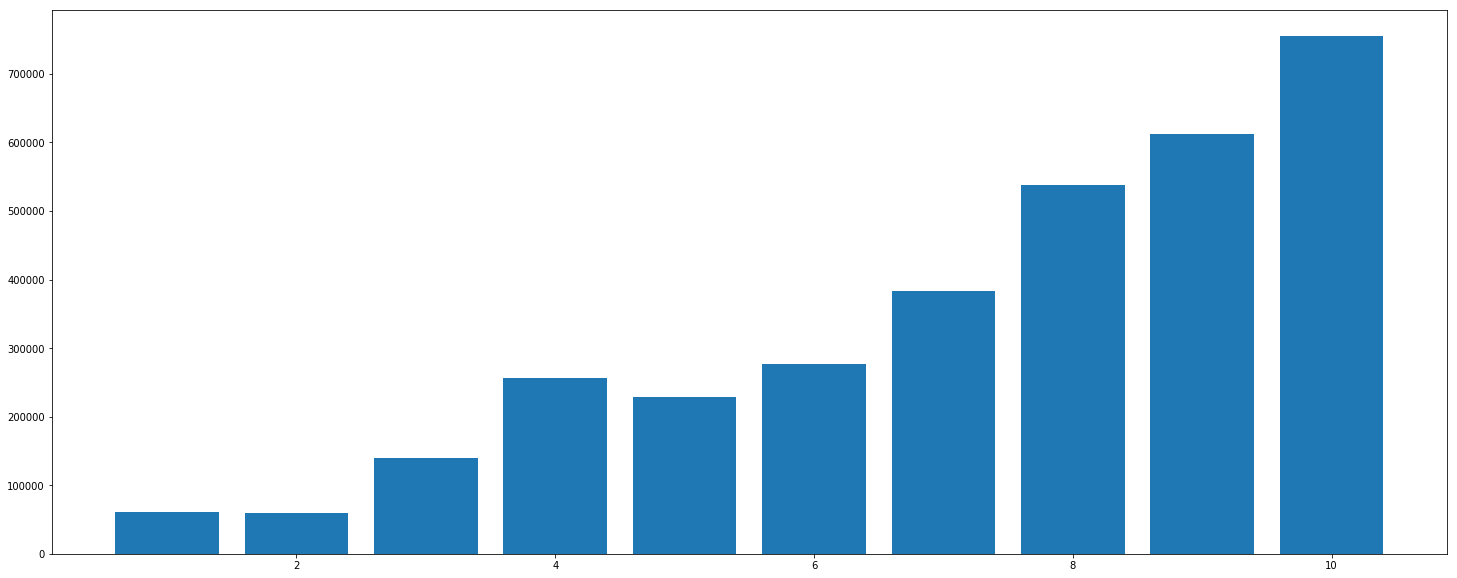

In [36]:
plt.rcParams['figure.figsize'] = (25,10)
quality = train_df.OverallQual[np.argsort(-train_df.OverallQual)]
plt.bar(train_df["OverallQual"], train_df.SalePrice )

In [37]:
train_df.OverallQual = train_df.OverallQual.replace([1,2,3],3)

In [38]:
train_df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3], dtype=int64)

In [39]:
train_df.YearRemodAdd.value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
       ... 
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

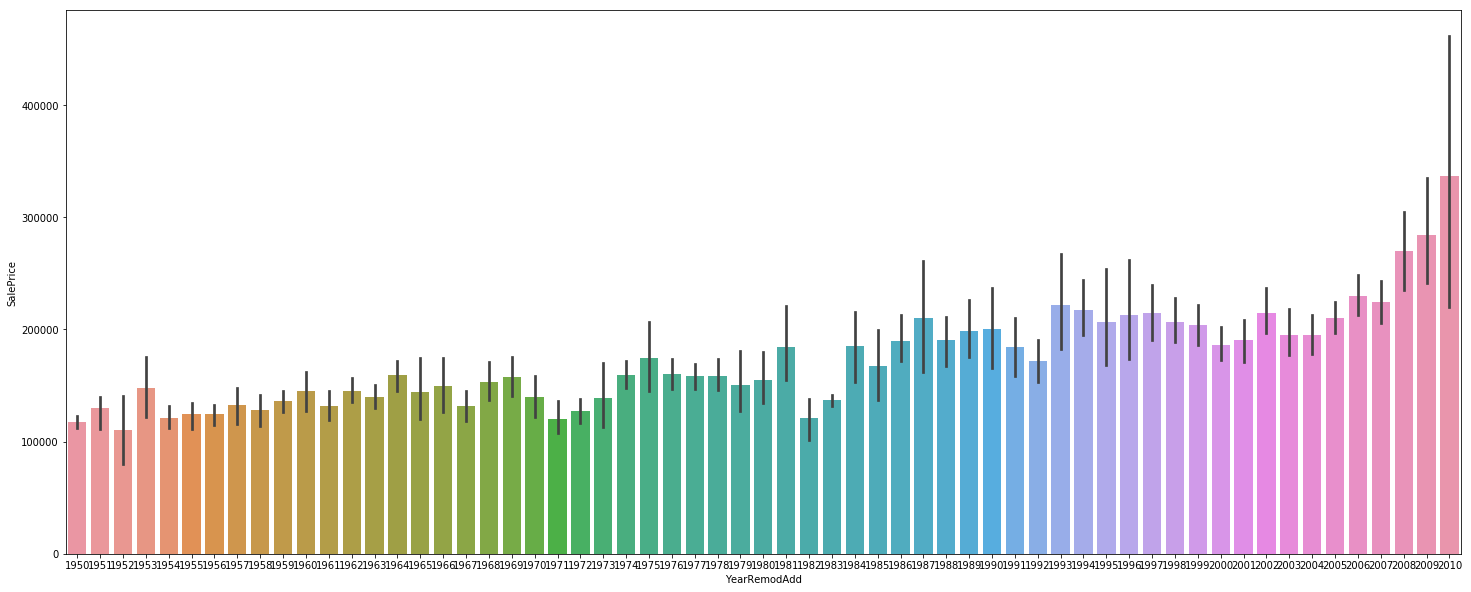

In [40]:
plt.rcParams['figure.figsize'] = (25,10)
sns.barplot(x = train_df.YearRemodAdd, y = train_df.SalePrice)

In [41]:
train_df["YearRemodBin"] = pd.cut(train_df["YearRemodAdd"], 6)

In [42]:
train_df["YearRemodBin"].unique()

[(2000.0, 2005.0], (1975.0, 1980.0], (1965.0, 1970.0], (1995.0, 2000.0], (1990.0, 1995.0], ..., (1960.0, 1965.0], (2005.0, 2010.0], (1955.0, 1960.0], (1985.0, 1990.0], (1980.0, 1985.0]]
Length: 12
Categories (12, interval[float64]): [(1949.94, 1955.0] < (1955.0, 1960.0] < (1960.0, 1965.0] < (1965.0, 1970.0] ... (1990.0, 1995.0] < (1995.0, 2000.0] < (2000.0, 2005.0] < (2005.0, 2010.0]]

In [43]:
train_df["YearRemodBin"].value_counts()

(2000.0, 2005.0]     255
(2005.0, 2010.0]     242
(1949.94, 1955.0]    220
(1995.0, 2000.0]     182
(1990.0, 1995.0]     103
(1975.0, 1980.0]      93
(1965.0, 1970.0]      84
(1970.0, 1975.0]      66
(1960.0, 1965.0]      65
(1955.0, 1960.0]      64
(1985.0, 1990.0]      50
(1980.0, 1985.0]      36
Name: YearRemodBin, dtype: int64

In [44]:
train_df["ExterQual"].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [45]:
train_df["ExterQual2"] = train_df["ExterQual"]
train_df["ExterQual2"] = train_df["ExterQual2"].replace(['Fa'],'TA')
train_df["ExterQual2"] = train_df["ExterQual2"].replace(['Ex'],'Gd')

In [46]:
train_df["ExterQual2"].unique()

array(['Gd', 'TA'], dtype=object)

In [47]:
train_df["HeatingQC"].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

C:\Users\CSY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


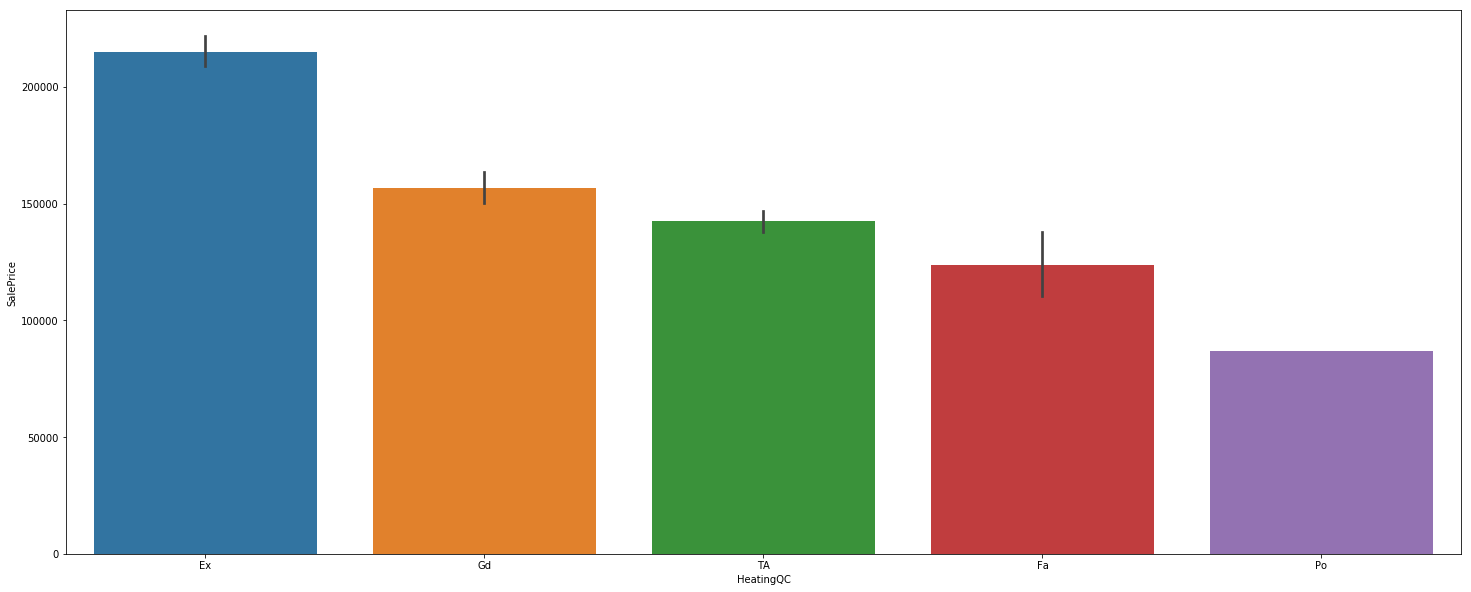

In [48]:
sns.barplot(x = train_df["HeatingQC"], y =  train_df.SalePrice )

In [49]:
train_df["HeatingQC2"] = train_df["HeatingQC"]
train_df["HeatingQC2"] = train_df["HeatingQC2"].replace(['Fa','Po'],'Bad')

In [50]:
train_df.HeatingQC2.unique()

array(['Ex', 'Gd', 'TA', 'Bad'], dtype=object)

In [51]:
train_df.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [52]:
train_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [53]:
train_df.Electrical.isnull().sum()

1

In [54]:
train_df.Electrical = train_df['Electrical'].fillna(method = 'ffill')

In [55]:
train_df.Electrical.isnull().sum()

0

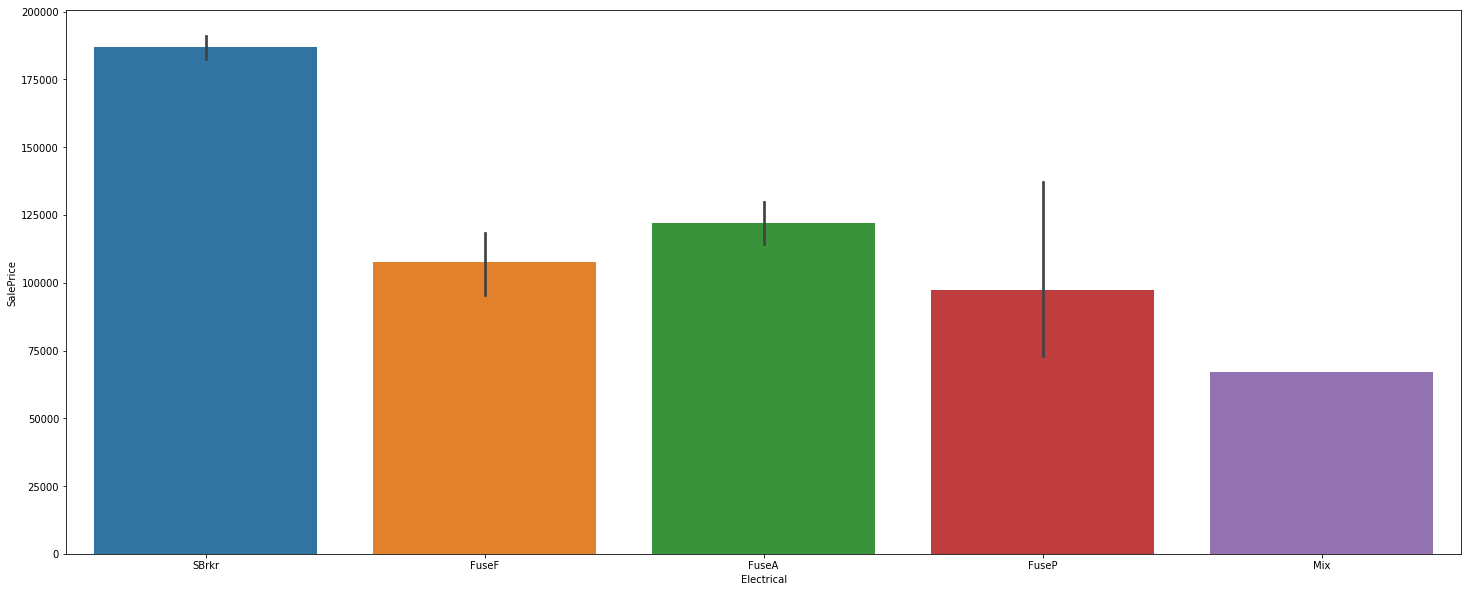

In [56]:
sns.barplot(x = train_df.Electrical, y = train_df.SalePrice)

In [57]:
train_df["Electrical2"] = train_df["Electrical"]
train_df["Electrical2"] = train_df["Electrical2"].replace(['FuseF','FuseA','FuseP','Mix'],'Fuse')

In [58]:
train_df["Electrical2"].unique()

array(['SBrkr', 'Fuse'], dtype=object)

In [59]:
train_df["GrLivArea"].value_counts()

864     22
1040    14
894     11
848     10
1456    10
912      9
1200     9
816      8
1092     8
1344     7
1728     7
987      7
1056     6
1224     6
1768     6
1494     6
1484     6
630      6
1144     5
1314     5
960      5
1252     5
1710     5
1392     5
988      5
990      5
1656     5
1218     5
1302     5
882      4
        ..
1357     1
1347     1
1453     1
1346     1
1343     1
1342     1
1338     1
1334     1
1327     1
1322     1
1385     1
1386     1
1387     1
1391     1
1446     1
3493     1
1436     1
1434     1
1429     1
1425     1
1411     1
1406     1
1405     1
1402     1
1400     1
3447     1
1396     1
1395     1
1393     1
2054     1
Name: GrLivArea, Length: 861, dtype: int64

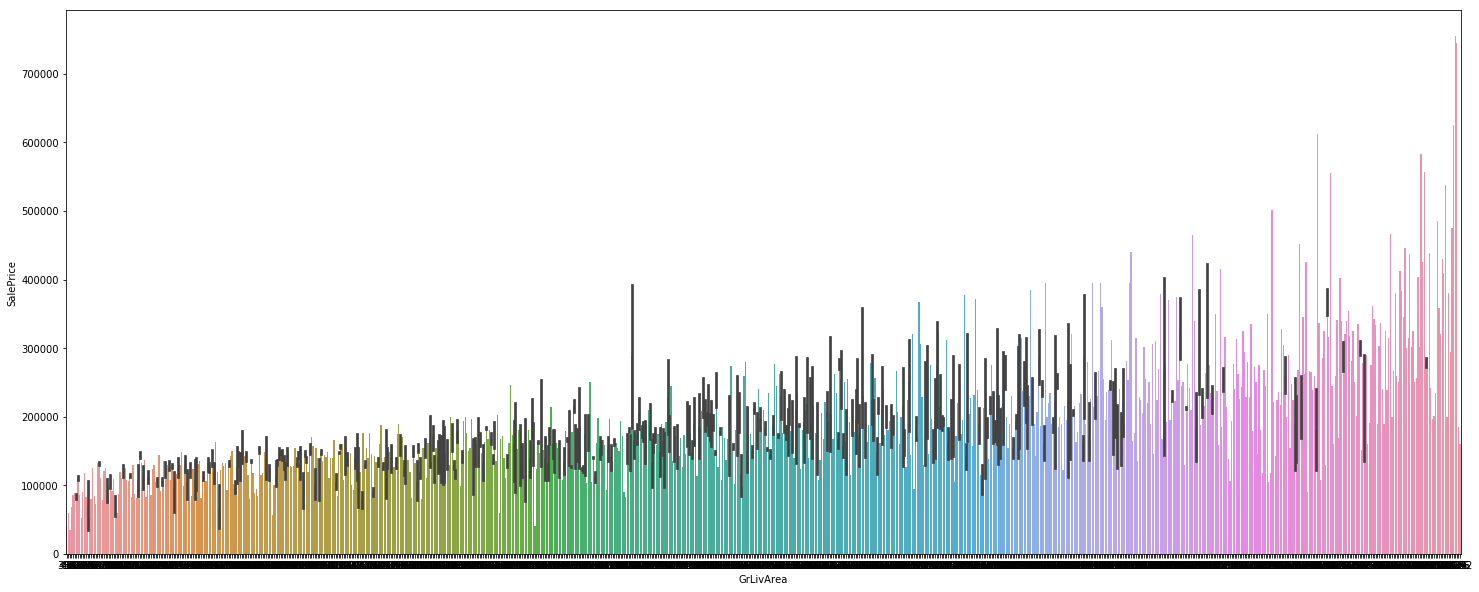

In [60]:
sns.barplot(x =train_df["GrLivArea"], y = train_df.SalePrice )

In [61]:
train_df["TotRmsAbvGrd"].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

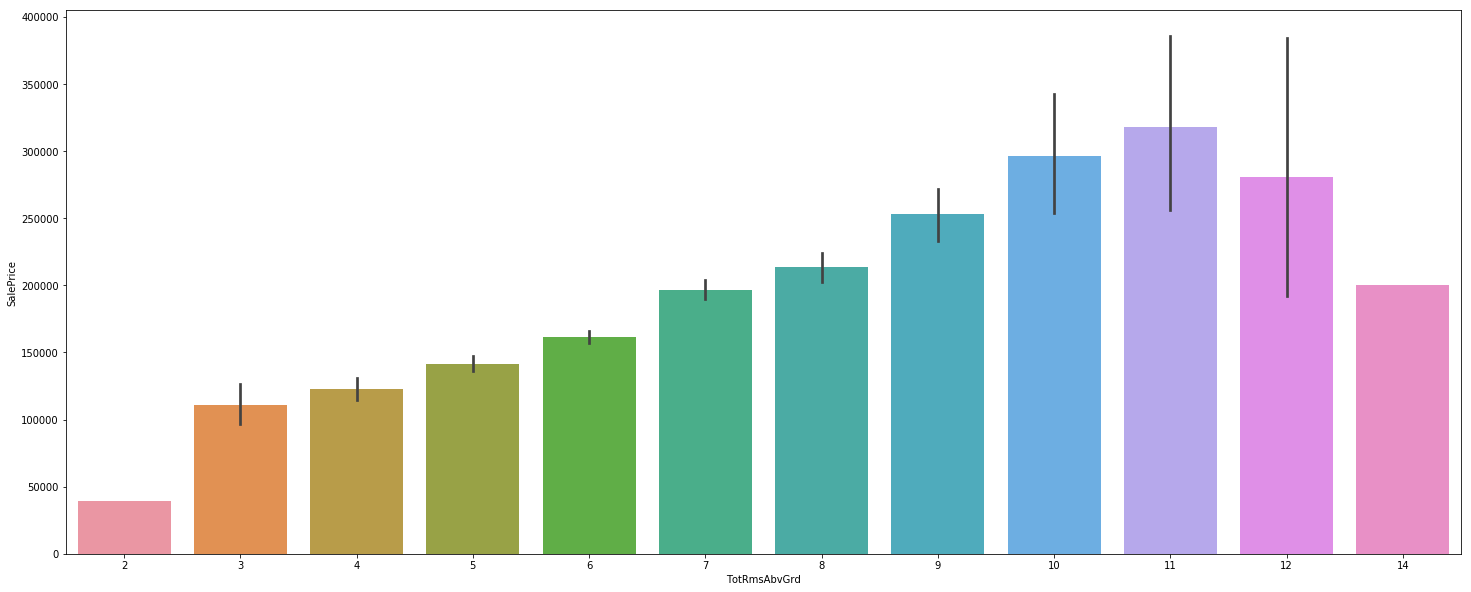

In [62]:
sns.barplot(x =train_df["TotRmsAbvGrd"], y = train_df.SalePrice )

In [63]:
train_df["TotRms2"] = train_df["TotRmsAbvGrd"]
train_df["TotRms2"] = train_df["TotRms2"].replace([2,3],4)
train_df["TotRms2"] = train_df["TotRms2"].replace([10, 11, 12],10)

In [64]:
train_df["TotRms2"].unique()

array([ 8,  6,  7,  9,  5, 10,  4, 14], dtype=int64)

In [65]:
train_df.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

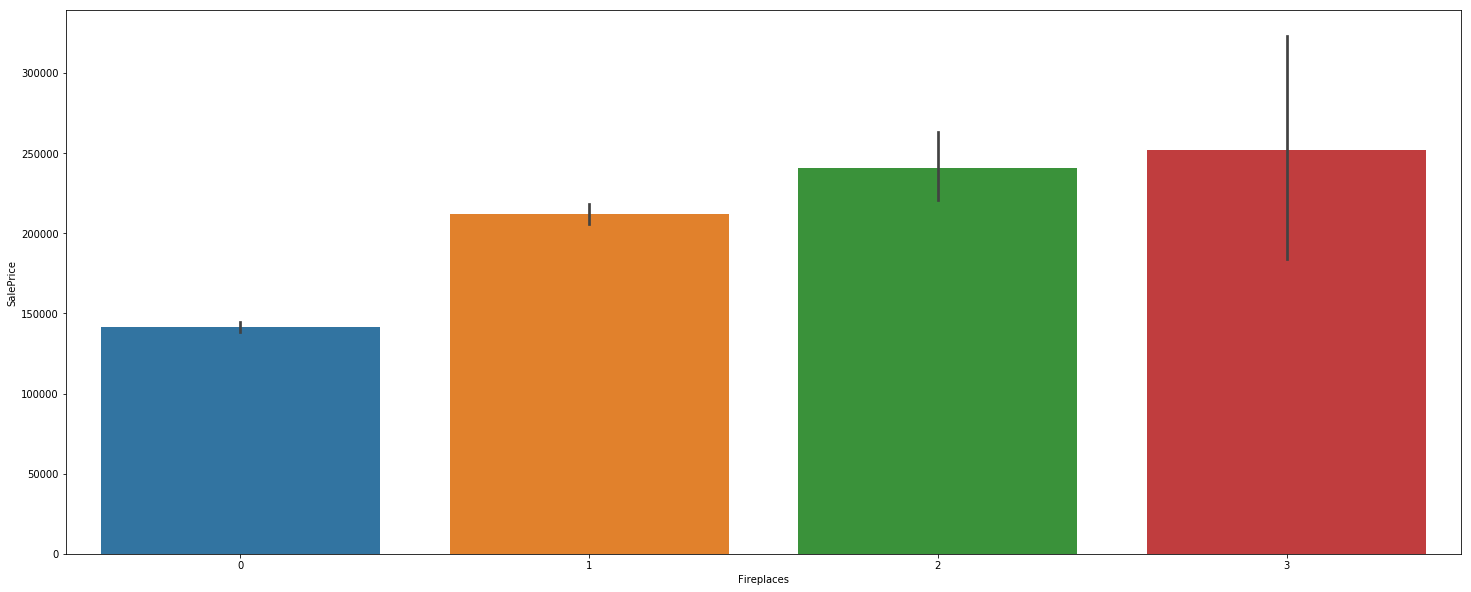

In [66]:
sns.barplot(x =train_df["Fireplaces"], y = train_df.SalePrice )

In [67]:
train_df["Fireplaces2"] = train_df["Fireplaces"]
train_df["Fireplaces2"] = train_df["Fireplaces2"].replace([3],2)

In [68]:
train_df["Fireplaces2"].unique()

array([0, 1, 2], dtype=int64)

In [69]:
train_df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

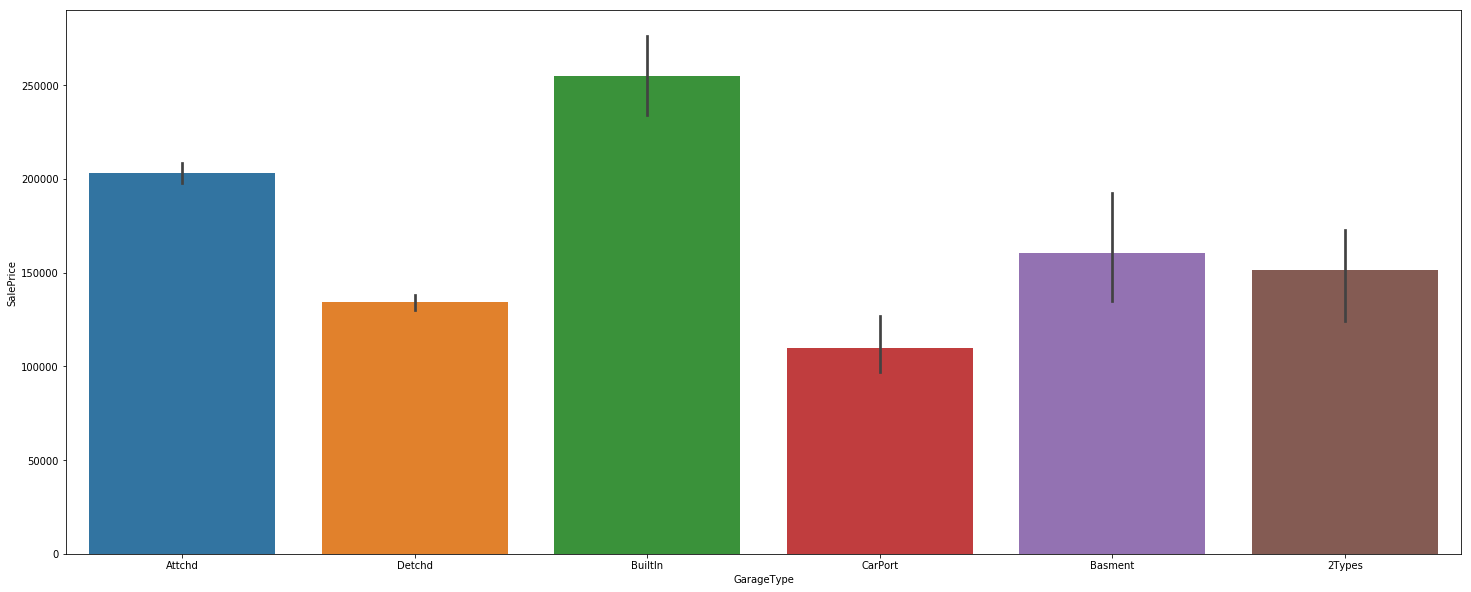

In [70]:
sns.barplot(x =train_df["GarageType"], y = train_df.SalePrice )

In [71]:
train_df["GarageType2"] = train_df["GarageType"]
train_df["GarageType2"] = train_df["GarageType2"].replace(['Basment','CarPort','2Types'],'Detchd')
train_df["GarageType2"] = train_df["GarageType2"].fillna("NoGarage")

In [72]:
train_df["GarageType2"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'NoGarage'], dtype=object)

In [73]:
train_df["GarageArea"].value_counts()

0       81
440     49
576     47
240     38
484     34
528     33
288     27
400     25
480     24
264     24
308     20
420     19
280     16
672     15
216     12
504     12
336     12
352     12
360     11
564     11
300     10
462     10
572     10
540     10
539      9
660      9
180      9
384      9
312      9
286      9
        ..
414      1
413      1
768      1
455      1
708      1
757      1
711      1
714      1
481      1
716      1
479      1
719      1
477      1
721      1
475      1
722      1
726      1
732      1
738      1
739      1
740      1
748      1
749      1
752      1
753      1
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, dtype: int64

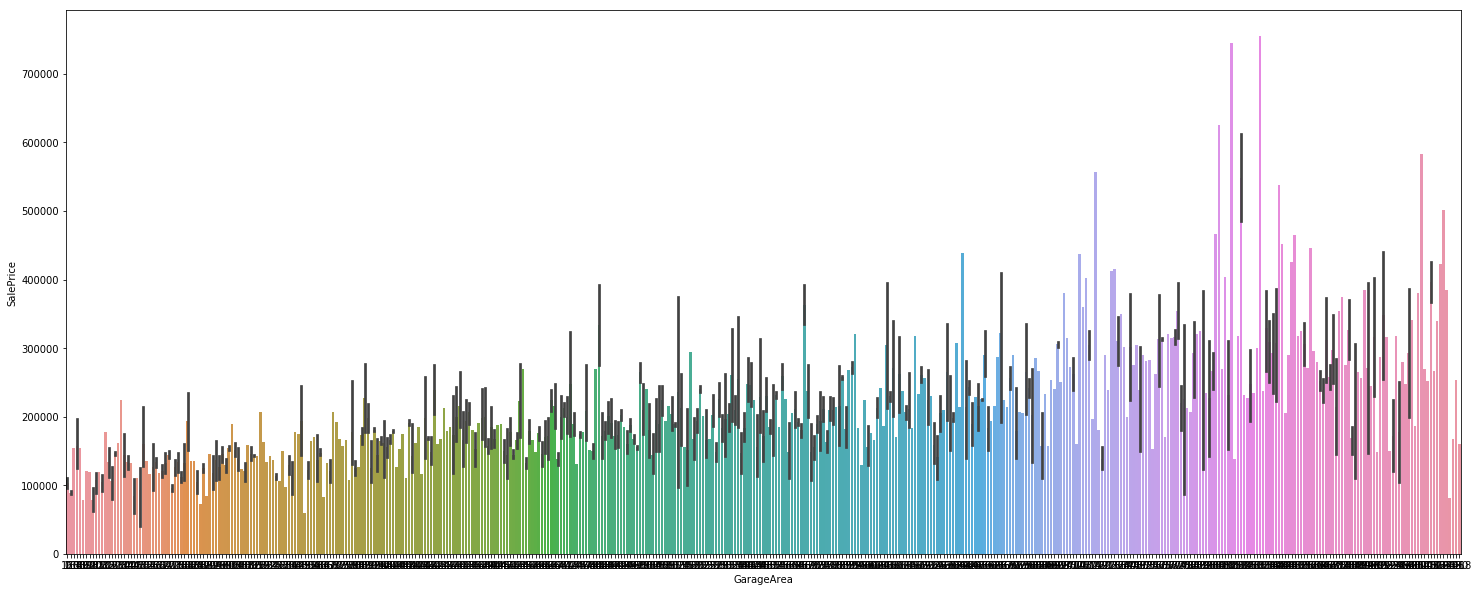

In [74]:
sns.barplot(x =train_df["GarageArea"], y = train_df.SalePrice )

In [75]:
train_df["GarageAreaBin"] = pd.qcut(train_df["GarageArea"],10)

C:\Users\CSY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


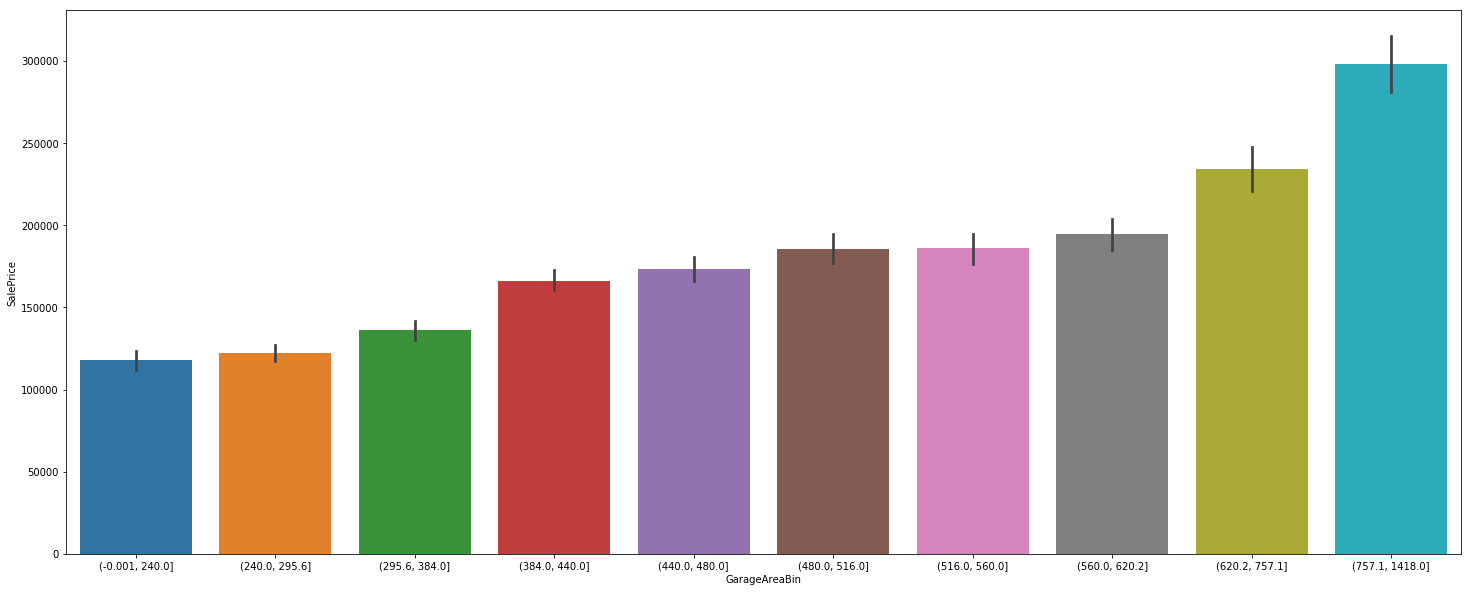

In [76]:
sns.barplot(x =train_df["GarageAreaBin"], y = train_df.SalePrice )

In [77]:
train_df["GarageAreaBin"].value_counts()

(384.0, 440.0]     188
(-0.001, 240.0]    168
(295.6, 384.0]     148
(757.1, 1418.0]    146
(620.2, 757.1]     146
(516.0, 560.0]     146
(560.0, 620.2]     145
(440.0, 480.0]     125
(480.0, 516.0]     124
(240.0, 295.6]     124
Name: GarageAreaBin, dtype: int64

In [78]:
# train_df.Electrical2.isnull().sum()

In [80]:
# train_df[['LotAreaLog'],['GrLiveArea']].head()

In [81]:
numerical_feature  = ['LotAreaLog','GrLivArea', 'TotRms2', 'Fireplaces2']
categorical_feature = [ 'LotShapeCat', 'LandContour', 'NeighborhoodBin', 'HouseStyleBin', 'OverallQual', 'YearRemodBin', \
                                'ExterQual2','HeatingQC2','CentralAir', 'Electrical2' ,'GarageType2','GarageAreaBin'] 

In [82]:
total_feature = numerical_feature + categorical_feature

In [83]:
X = train_df[total_feature]

In [84]:
X.head()

,LotAreaLog,GrLivArea,TotRms2,Fireplaces2,LotShapeCat,LandContour,NeighborhoodBin,HouseStyleBin,OverallQual,YearRemodBin,ExterQual2,HeatingQC2,CentralAir,Electrical2,GarageType2,GarageAreaBin
0,13.044736,1710,8,0,Reg,Lvl,tier1,Floor2,7,"(2000.0, 2005.0]",Gd,Ex,Y,SBrkr,Attchd,"(516.0, 560.0]"
1,13.228819,1262,6,1,Reg,Lvl,tier1,Floor1,6,"(1975.0, 1980.0]",TA,Ex,Y,SBrkr,Attchd,"(440.0, 480.0]"
2,13.457637,1786,6,1,IR,Lvl,tier1,Floor2,7,"(2000.0, 2005.0]",Gd,Ex,Y,SBrkr,Attchd,"(560.0, 620.2]"
3,13.221285,1717,7,1,IR,Lvl,tier2,Floor2,7,"(1965.0, 1970.0]",TA,Gd,Y,SBrkr,Detchd,"(620.2, 757.1]"
4,13.799686,2198,9,1,IR,Lvl,tier2,Floor2,8,"(1995.0, 2000.0]",Gd,Ex,Y,SBrkr,Attchd,"(757.1, 1418.0]"


In [85]:
y = train_df['SalePrice']

In [86]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [87]:
enc.fit(train_df[categorical_feature])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [88]:
enc.categories_

[array(['IR', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['tier1', 'tier2', 'tier3', 'tier4', 'tier5'], dtype=object),
 array(['Floor1', 'Floor1.5', 'Floor2'], dtype=object),
 array([3, 4, 5, 6, 7, 8, 9, 10], dtype=object),
 array([Interval(1949.94, 1955.0, closed='right'),
        Interval(1955.0, 1960.0, closed='right'),
        Interval(1960.0, 1965.0, closed='right'),
        Interval(1965.0, 1970.0, closed='right'),
        Interval(1970.0, 1975.0, closed='right'),
        Interval(1975.0, 1980.0, closed='right'),
        Interval(1980.0, 1985.0, closed='right'),
        Interval(1985.0, 1990.0, closed='right'),
        Interval(1990.0, 1995.0, closed='right'),
        Interval(1995.0, 2000.0, closed='right'),
        Interval(2000.0, 2005.0, closed='right'),
        Interval(2005.0, 2010.0, closed='right')], dtype=object),
 array(['Gd', 'TA'], dtype=object),
 array(['Bad', 'Ex', 'Gd', 'TA'], dtype=object),
 array(['N', 'Y'], dtype=object),
 

In [89]:
enc_res = enc.transform(train_df[categorical_feature])

In [90]:
print(enc_res.toarray())

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
sc = StandardScaler()
scaled_numerical_feature = sc.fit_transform(train_df[numerical_feature])

C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [93]:
scaled_numerical_feature = pd.DataFrame(scaled_numerical_feature)

In [94]:
onehot_added = pd.DataFrame(enc_res.toarray())
all_x = pd.concat([scaled_numerical_feature,onehot_added],axis = 1)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
#训练&试验split
xTrain, xVal, yTrain, yVal = train_test_split(all_x, y, test_size = 0.2, random_state = 1)

### Linear Regression 

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lin = LinearRegression()
lin.fit(xTrain, yTrain)
lin_xVal_predict = lin.predict(xVal)

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
mse_lin = mean_squared_error(lin_xVal_predict, yVal)
np.sqrt(mse_lin)

31391.984802805782

In [101]:
yVal.mean()

175772.61301369863

### RandomForest

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rf = RandomForestRegressor()

In [104]:
rf.fit(xTrain, yTrain)

C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [105]:
rf_xVal_predict = rf.predict(xVal)

In [106]:
mse_rf = mean_squared_error(rf_xVal_predict, yVal)
np.sqrt(mse_rf)

32873.113388673846

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [108]:
param_grid = {
    'max_depth': [7,10,13,15,17],
    'max_features': [5,7,10],
    'min_samples_split': [2,5,10],
    'n_estimators': [20,50,100]
}

In [109]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid,n_iter=100, 
                          cv = 10)

In [110]:
rf_random.fit(xTrain,yTrain)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': [7, 10, 13, 15, 17], 'max_features': [5, 7, 10], 'min_samples_split': [2, 5, 10], 'n_estimators': [20, 50, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [111]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [112]:
pred_rf_rand = rf_random.predict(xVal)

In [113]:
mse_rf_rand = mean_squared_error(pred_rf_rand, yVal)
np.sqrt(mse_rf_rand)

31765.76763523173

## Test Set

In [114]:
test_df = pd.read_csv("test.csv")

In [115]:
test_df['LotAreaLog'] = np.log2(test_df.LotArea)

In [116]:
test_df['LotAreaLog'].isnull().sum()

0

In [117]:
test_df['LotShapeCat'] = test_df.LotShape.replace(["IR1","IR2","IR3"],"IR")

In [118]:
test_df['LotShapeCat'].unique()

array(['Reg', 'IR'], dtype=object)

In [119]:
test_df["NeighborhoodBin"]  = test_df["Neighborhood"]
test_df["NeighborhoodBin"]  = test_df["NeighborhoodBin"].replace(["Veenker", "CollgCr"], "tier1")
test_df["NeighborhoodBin"]  = test_df["NeighborhoodBin"].replace(["Crawfor", "NoRidge", "Mitchel","Somerst","NWAmes"], "tier2")
test_df["NeighborhoodBin"]  = test_df["NeighborhoodBin"].replace(["OldTown","BrkSide","Sawyer","NridgHt","NAmes",\
                                                              "SawyerW","IDOTRR","MeadowV"], "tier3")
test_df["NeighborhoodBin"]  = test_df["NeighborhoodBin"].replace(["Edwards", "Timber","Gilbert","StoneBr","ClearCr"], "tier4")
test_df["NeighborhoodBin"]  = test_df["NeighborhoodBin"].replace(["NPkVill", "Blmngtn","BrDale","SWISU","Blueste"], "tier5")

In [120]:
test_df['NeighborhoodBin'].unique()

array(['tier3', 'tier4', 'tier5', 'tier2', 'tier1'], dtype=object)

In [121]:
test_df["HouseStyleBin"]  = test_df["HouseStyle"]
test_df["HouseStyleBin"]  = test_df["HouseStyleBin"].replace(["2Story", "2.5Fin"], "Floor2")
test_df["HouseStyleBin"]  = test_df["HouseStyleBin"].replace(["1.5Fin", "1.5Unf","SFoyer", "2.5Unf"], "Floor1.5")
test_df["HouseStyleBin"]  = test_df["HouseStyleBin"].replace(["SLvl","1Story"], "Floor1")

In [122]:
test_df['HouseStyleBin'].unique()

array(['Floor1', 'Floor2', 'Floor1.5'], dtype=object)

In [123]:
test_df['OverallQual'] = test_df.OverallQual.replace([1,2,3],3)

In [124]:
test_df['OverallQual'].unique()

array([ 5,  6,  8,  7,  4,  9,  3, 10], dtype=int64)

In [125]:
test_df["YearRemodBin"] = pd.cut(test_df["YearRemodAdd"], 6)

In [126]:
test_df['YearRemodBin'].unique()

[(1960.0, 1965.0], (1955.0, 1960.0], (1995.0, 2000.0], (1990.0, 1995.0], (2005.0, 2010.0], ..., (1970.0, 1975.0], (2000.0, 2005.0], (1949.94, 1955.0], (1975.0, 1980.0], (1980.0, 1985.0]]
Length: 12
Categories (12, interval[float64]): [(1949.94, 1955.0] < (1955.0, 1960.0] < (1960.0, 1965.0] < (1965.0, 1970.0] ... (1990.0, 1995.0] < (1995.0, 2000.0] < (2000.0, 2005.0] < (2005.0, 2010.0]]

In [127]:
test_df["ExterQual2"] = test_df["ExterQual"]
test_df["ExterQual2"] = test_df["ExterQual2"].replace(['Fa'],'TA')
test_df["ExterQual2"] = test_df["ExterQual2"].replace(['Ex'],'Gd')

In [128]:
test_df['ExterQual2'].unique()

array(['TA', 'Gd'], dtype=object)

In [129]:
test_df["HeatingQC2"] = test_df["HeatingQC"]
test_df["HeatingQC2"] = test_df["HeatingQC2"].replace(['Fa','Po'],'Bad')

In [130]:
test_df['HeatingQC2'].unique()

array(['TA', 'Gd', 'Ex', 'Bad'], dtype=object)

In [131]:
test_df["Electrical2"] = test_df["Electrical"]
test_df["Electrical2"] = test_df["Electrical2"].replace(['FuseF','FuseA','FuseP','Mix'],'Fuse')

In [132]:
test_df['Electrical2'].unique()

array(['SBrkr', 'Fuse'], dtype=object)

In [133]:
test_df["TotRms2"] = test_df["TotRmsAbvGrd"]
test_df["TotRms2"] = test_df["TotRms2"].replace([2,3],4)
test_df["TotRms2"] = test_df["TotRms2"].replace([10, 11, 12],10)

In [134]:
test_df['TotRms2'].unique()

array([ 5,  6,  7,  4, 10,  8,  9, 13, 15], dtype=int64)

In [135]:
test_df["Fireplaces2"] = test_df["Fireplaces"]
test_df["Fireplaces2"] = test_df["Fireplaces2"].replace([3],2)

In [136]:
test_df['Fireplaces2'].unique()

array([0, 1, 2, 4], dtype=int64)

In [137]:
test_df["GarageType2"] = test_df["GarageType"]
test_df["GarageType2"] = test_df["GarageType2"].replace(['Basment','CarPort','2Types'],'Detchd')
test_df["GarageType2"] = test_df["GarageType2"].fillna("NoGarage")

In [138]:
test_df['GarageType2'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'NoGarage'], dtype=object)

In [139]:
test_df['GarageArea'].isnull().sum()

1

In [140]:
test_df['GarageArea'] = test_df['GarageArea'].fillna(0)

In [141]:
test_df['GarageArea'].isnull().sum()

0

In [142]:
test_df["GarageAreaBin"] = pd.qcut(test_df["GarageArea"],10)

In [143]:
test_df['GarageAreaBin'].unique()

[(621.0, 758.0], (296.2, 365.4], (480.0, 510.8], (437.0, 480.0], (365.4, 437.0], (510.8, 561.0], (240.0, 296.2], (758.0, 1488.0], (561.0, 621.0], (-0.001, 240.0]]
Categories (10, interval[float64]): [(-0.001, 240.0] < (240.0, 296.2] < (296.2, 365.4] < (365.4, 437.0] ... (510.8, 561.0] < (561.0, 621.0] < (621.0, 758.0] < (758.0, 1488.0]]

In [144]:
test_df['GarageAreaBin'].isnull().sum()

0

In [145]:
scaled_numerical_feature_test = sc.fit_transform(test_df[numerical_feature])

C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [146]:
enc.fit(test_df[categorical_feature])
enc_res_test = enc.transform(test_df[categorical_feature])
scaled_numerical_feature_test = pd.DataFrame(scaled_numerical_feature_test)
onehot_added_test = pd.DataFrame(enc_res_test.toarray())
all_x_test = pd.concat([scaled_numerical_feature_test,onehot_added_test],axis = 1)

In [147]:
test_df['prediction'] = rf_random.predict(all_x_test)

In [148]:
dataframe = pd.DataFrame({'Id':test_df['Id'],'SalePrice':test_df['prediction']})
dataframe.to_csv("Predict.csv",index=False)